QUANTUM CLASE 08/10/2024: HACER KERNEL DE SUPORT VECTOR MACHINES (SVM) A MANO.

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()

# Convertir a DataFrame para mayor flexibilidad
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df = df[['sepal length (cm)', 'sepal width (cm)', 'target']]

# Eliminar una de las clases (por ejemplo, la clase con target == 2)
df = df[df['target'] != 2]

# Separar características (X) y etiquetas (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividir en conjuntos de entrenamiento y prueba (80% para entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Imprimir la forma de los conjuntos
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')
print(f'Tamaño de las etiquetas de entrenamiento: {y_train.shape}')
print(f'Tamaño de las etiquetas de prueba: {y_test.shape}')

Tamaño del conjunto de entrenamiento: (80, 2)
Tamaño del conjunto de prueba: (20, 2)
Tamaño de las etiquetas de entrenamiento: (80,)
Tamaño de las etiquetas de prueba: (20,)


C:\Users\pablo\AppData\Local\Temp\ipykernel_28716\3262100733.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
import numpy as np

def kernel_lineal(X):
    # Convertir el DataFrame a un array de NumPy si es necesario
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # Obtener el número de muestras
    n = X.shape[0]
    
    # Inicializar la matriz del kernel con ceros
    K = np.zeros((n, n))
    
    # Calcular el kernel lineal
    for i in range(n):
        for j in range(n):
            K[i, j] = np.dot(X[i, :], X[j, :])  # Producto escalar entre las filas i y j
    
    return K

# Suponiendo que X_train es un DataFrame de pandas
kernel_l = np.array(kernel_lineal(X_train))
print(kernel_l)

[[ 0.46834132  0.16295388 -0.66308141 ... -0.98727754  0.77372875
   0.34190241]
 [ 0.16295388  0.06418313 -0.25399882 ... -0.21854981  0.26172463
   0.23685342]
 [-0.66308141 -0.25399882  1.0112457  ...  1.00902525 -1.072164
  -0.85084477]
 ...
 [-0.98727754 -0.21854981  1.00902525 ...  4.16737952 -1.75600527
   1.24740881]
 [ 0.77372875  0.26172463 -1.072164   ... -1.75600527  1.28573287
   0.4469514 ]
 [ 0.34190241  0.23685342 -0.85084477 ...  1.24740881  0.4469514
   2.10640488]]


LO siguiente se hizo en la clase del 15/10/2024:

KERNEL POLINOMICO:

In [4]:
import numpy as np

def kernel_polinomico(X, c=1, d=2):
    """
    Kernel polinómico de segundo grado: K(x_i, x_j) = (x_i · x_j + c)^d
    :param X: Matriz de entrada de datos (puede ser un DataFrame o un array de NumPy).
    :param c: Constante de desplazamiento (por defecto es 1).
    :param d: Grado del polinomio (por defecto es 2).
    :return: Matriz del kernel polinómico.
    """
    # Convertir el DataFrame a un array de NumPy si es necesario
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # Obtener el número de muestras
    n = X.shape[0]
    
    # Inicializar la matriz del kernel con ceros
    K = np.zeros((n, n))
    
    # Calcular el kernel polinómico
    for i in range(n):
        for j in range(n):
            K[i, j] = (np.dot(X[i, :], X[j, :]) + c) ** d  # Kernel polinómico de segundo grado
    
    return K

# Suponiendo que X_train es un DataFrame de pandas
kernel_p = np.array(kernel_polinomico(X_train))
print(kernel_p)

[[2.15602622e+00 1.35246174e+00 1.13514136e-01 ... 1.61861033e-04
  3.14611368e+00 1.80070208e+00]
 [1.35246174e+00 1.13248574e+00 5.56517756e-01 ... 6.10664400e-01
  1.59194905e+00 1.52980638e+00]
 [1.13514136e-01 5.56517756e-01 4.04510926e+00 ... 4.03618247e+00
  5.20764254e-03 2.22472830e-02]
 ...
 [1.61861033e-04 6.10664400e-01 4.03618247e+00 ... 2.67018111e+01
  5.71543964e-01 5.05084634e+00]
 [3.14611368e+00 1.59194905e+00 5.20764254e-03 ... 5.71543964e-01
  5.22457475e+00 2.09366836e+00]
 [1.80070208e+00 1.52980638e+00 2.22472830e-02 ... 5.05084634e+00
  2.09366836e+00 9.64975126e+00]]


APLICACIÓN:

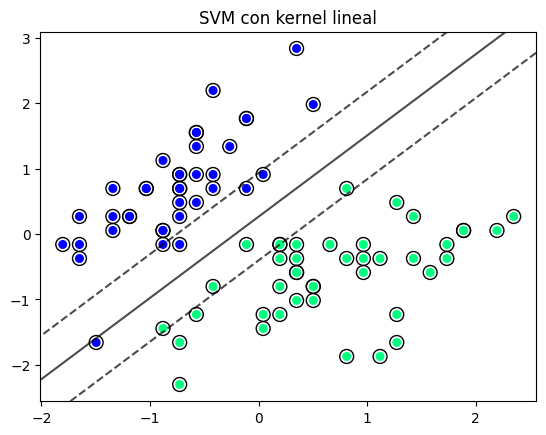

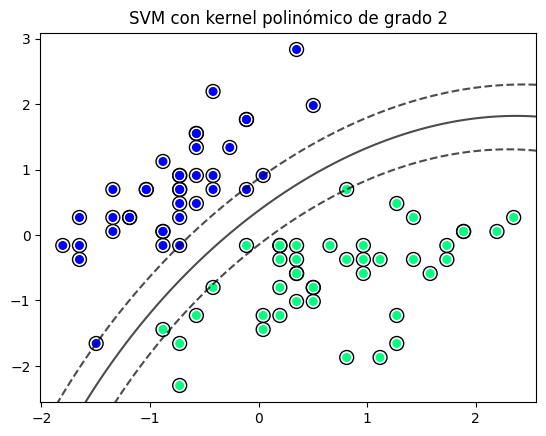

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

def kernel_lineal(X, Y):
    """
    Kernel lineal: K(x_i, x_j) = x_i · x_j
    :param X: Matriz de entrada de datos X (puede ser un DataFrame o un array de NumPy).
    :param Y: Matriz de entrada de datos Y (puede ser un DataFrame o un array de NumPy).
    :return: Matriz del kernel lineal.
    """
    # Convertir DataFrames a arrays de NumPy si es necesario
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    if isinstance(Y, pd.DataFrame):
        Y = Y.to_numpy()

    # Calcular el kernel lineal de manera vectorizada
    return np.dot(X, Y.T)

def kernel_polinomico(X, Y, c=1, d=2):
    """
    Kernel polinómico de segundo grado: K(x_i, x_j) = (x_i · x_j + c)^d
    :param X: Matriz de entrada de datos X (puede ser un DataFrame o un array de NumPy).
    :param Y: Matriz de entrada de datos Y (puede ser un DataFrame o un array de NumPy).
    :param c: Constante de desplazamiento (por defecto es 1).
    :param d: Grado del polinomio (por defecto es 2).
    :return: Matriz del kernel polinómico.
    """
    # Convertir DataFrames a arrays de NumPy si es necesario
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    if isinstance(Y, pd.DataFrame):
        Y = Y.to_numpy()

    # Calcular el kernel polinómico de manera vectorizada
    return (np.dot(X, Y.T) + c) ** d


# Precomputar los kernels
kernel_l = kernel_lineal(X_train, X_train)
kernel_p = kernel_polinomico(X_train, X_train)

# Entrenar SVM con kernel lineal precomputado
svm_lineal = svm.SVC(kernel='precomputed')
svm_lineal.fit(kernel_l, y_train[:100])

# Entrenar SVM con kernel polinómico precomputado
svm_polinomico = svm.SVC(kernel='precomputed')
svm_polinomico.fit(kernel_p, y_train[:100])

# Función para graficar la clasificación
def graficar_clasificacion(modelo, X, y, titulo, kernel_fn):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=30)
    
    # Crear una malla para el contorno
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    
    # Precomputar el kernel para la malla
    X_mesh = np.c_[xx.ravel(), yy.ravel()]
    kernel_mesh = kernel_fn(X_mesh, X)
    
    Z = modelo.decision_function(kernel_mesh)
    Z = Z.reshape(xx.shape)

    # Dibujar el contorno y los márgenes
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
               linestyles=['--', '-', '--'])

    # Dibujar los vectores soporte
    ax.scatter(X[:, 0], X[:, 1], s=100, linewidth=1,
               facecolors='none', edgecolors='k')

    plt.title(titulo)
    plt.show()

# Graficar la clasificación para el kernel lineal
graficar_clasificacion(svm_lineal, X_train, y_train[:100], "SVM con kernel lineal", kernel_lineal)

# Graficar la clasificación para el kernel polinómico de segundo grado
graficar_clasificacion(svm_polinomico, X_train, y_train[:100], "SVM con kernel polinómico de grado 2", kernel_polinomico)

DEBERES HACER UNO PERSONALIZADO DE VERDAD.

In [ ]:
def calculator_kernel(X, Y):
    """
    Calcula el kernel polinómico entre dos matrices X y Y usando bucles anidados.
    Puede trabajar con DataFrames de pandas o numpy arrays.
    """
    # Asegurarse de que X y Y sean numpy arrays
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(Y, pd.DataFrame):
        Y = Y.values
    
    # Obtener las dimensiones de las matrices
    n_samples_X, n_features = X.shape
    n_samples_Y = Y.shape[0]
    
    # Crear una matriz de ceros para almacenar el resultado
    kernel_matrix = np.zeros((n_samples_X, n_samples_Y))
    
   # Bucle anidado para calcular el kernel
    for i in range(n_samples_X):
        for j in range(n_samples_Y):
            dot_product = 0
            for k in range(n_features):
                # Transformaciones complejas
                term1 = np.sin(X[i, k]**2) * np.cos(Y[j, k]**2)                         # Seno y coseno de cuadrados
                term2 = np.log1p(np.abs(X[i, k] - Y[j, k]) + 1)                       # Logaritmo de la diferencia
                term3 = np.exp(-0.5 * (X[i, k] - Y[j, k])**2)                        # Exponencial gaussiana
                term4 = np.tanh(X[i, k] * Y[j, k] + 1)                                # Tangente hiperbólica desplazada
                term5 = np.power(X[i, k] * Y[j, k], 3)                                # Producto elevado a la potencia cúbica
                term6 = np.arctan(X[i, k] * Y[j, k])                                  # Arcotangente del producto
                term7 = np.abs(np.sin(X[i, k]) - np.cos(Y[j, k]))                    # Diferencia de seno y coseno
                term8 = np.sqrt(np.maximum(0, np.abs(X[i, k] * Y[j, k])))            # Raíz cuadrada del producto (no negativa)
                term9 = np.sinh(X[i, k]) * np.cosh(Y[j, k])                          # Hiperbólicos
                term10 = np.log1p(np.maximum(0, np.abs(X[i, k]**2 - Y[j, k]**2)))    # Logaritmo de la diferencia de cuadrados
                term11 = (np.sin(X[i, k]) + np.cos(Y[j, k])) * np.exp(X[i, k] + Y[j, k])  # Seno y coseno con exponencial
                term12 = np.sqrt(np.maximum(0, X[i, k] + Y[j, k])) + np.log1p(np.maximum(0, X[i, k] + Y[j, k])) # Raíz cuadrada y logaritmo
                
                # Sumar los términos
                dot_product += term1 + term2 + term3 + term4 + term5 + term6 + term7 + term8 + term9 + term10 + term11 + term12
            
            # Normalizar y asegurar que el resultado esté en un rango válido
            kernel_matrix[i, j] = np.log1p(np.maximum(0, np.abs(dot_product) + 1))  # Aplicar log1p al resultado final
    
    return kernel_matrix
# Precomputar los kernels
kernel_3 = calculator_kernel(X_train, X_train)

# Entrenar SVM con kernel precomputado
svm_lineal1 = svm.SVC(kernel='precomputed')
svm_lineal1.fit(kernel_3, y_train[:100])

In [ ]:
# Graficar la clasificación para el kernel personalizado
graficar_clasificacion(svm_lineal1, X_train, y_train[:100], "SVM con kernel Personalizado", calculator_kernel)